In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gamma

In [38]:
path = "outputs/"
filename = "batch_profiling_results_red_cuda_20240912_123029.csv"
df = pd.read_csv(path+filename)

In [39]:
grouped_df = df.groupby(['model_alias', 'batch_size']).mean().reset_index()
grouped_df

,model_alias,batch_size,processing_time,throughput
0,gemma-7b,1,0.909585,1.100
1,gemma-7b,2,0.970743,2.063
2,gemma-7b,3,0.974784,3.084
3,gemma-7b,4,1.007497,3.980
4,gemma-7b,6,1.130917,5.338
...,...,...,...,...
65,llama3-8b,100,9.802704,10.908
66,llama3-8b,112,10.890086,10.468
67,llama3-8b,128,12.277890,10.609
68,llama3-8b,144,15.016311,9.880


In [40]:
grouped_df.loc[:,"processing_time_std"] = df.groupby(['model_alias', 'batch_size']).std().reset_index()["processing_time"]
grouped_df.loc[:,"throughput_std"] = df.groupby(['model_alias', 'batch_size']).std().reset_index()["throughput"]

In [41]:
grouped_df

,model_alias,batch_size,processing_time,throughput,processing_time_std,throughput_std
0,gemma-7b,1,0.909585,1.100,0.019548,0.024495
1,gemma-7b,2,0.970743,2.063,0.024933,0.052504
2,gemma-7b,3,0.974784,3.084,0.052050,0.156716
3,gemma-7b,4,1.007497,3.980,0.053424,0.213229
4,gemma-7b,6,1.130917,5.338,0.095704,0.418006
...,...,...,...,...,...,...
65,llama3-8b,100,9.802704,10.908,2.699821,2.890824
66,llama3-8b,112,10.890086,10.468,1.469503,1.513956
67,llama3-8b,128,12.277890,10.609,1.619804,1.552006
68,llama3-8b,144,15.016311,9.880,2.711470,1.805701


In [42]:
grouped_df.to_csv("results/batch_profiling_results_red_cuda_grouped.csv", index=False)

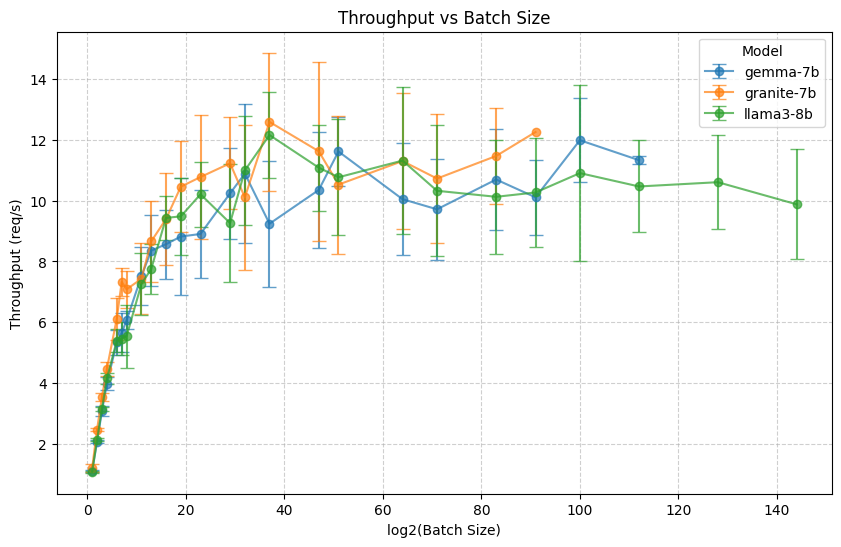

In [50]:
plt.figure(figsize=(10, 6))

# Group data by model alias
grouped = grouped_df.groupby('model_alias')

# Plot for each model
for model, group in grouped:
    plt.errorbar(group['batch_size'], group['throughput'], yerr=group['throughput_std'], 
                 label=model, fmt='-o', capsize=5, alpha = 0.7)

# Set plot labels and title
plt.xlabel('log2(Batch Size)')
plt.ylabel('Throughput (req/s)')
plt.title('Throughput vs Batch Size')
plt.legend(title='Model')
plt.grid(linestyle = "--", alpha = 0.6)

# Show the plot
plt.show()

In [32]:
path = "gpu_utilization/"
filename = "gpu_usage_20240912_123045.csv"
df = pd.read_csv(path+filename, header= None, names=['time', 'utilization'])

# Remove the '%' symbol and convert the column to integers
df['utilization'] = df['utilization'].str.replace('%', '').astype(int)

# Calculate the mean utilization
mean_utilization = df['utilization'].mean()

print(f"Mean GPU Utilization: {mean_utilization:.2f}%")

Mean GPU Utilization: 74.10%


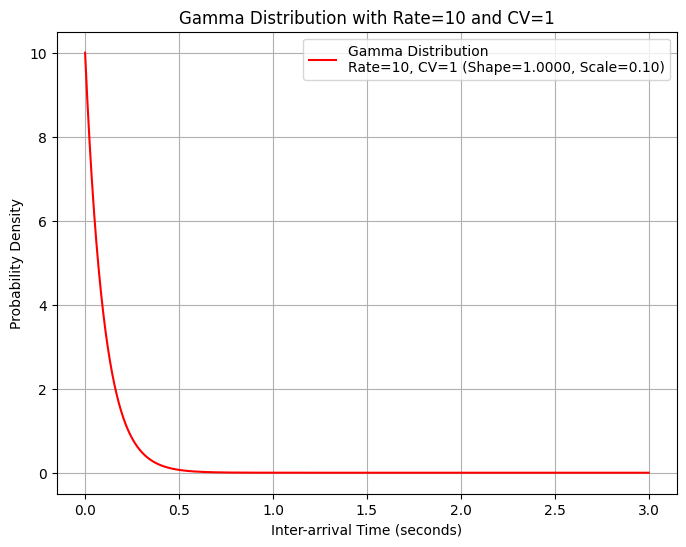

In [25]:
# Given rate and CV
rate = 10  # Rate (inverse of scale)
cv = 1  # Coefficient of Variation

# We need to compute alpha and scale (theta)
# CV = 1 / sqrt(alpha), so alpha = 1 / CV^2
alpha = 1 / cv**2

# Scale (theta) is 1 / rate
theta = 1 / rate

# Create a range of values for the x-axis
x_cv = np.linspace(0, 3, 1000)

# Compute the Gamma distribution's probability density function (PDF) with the new parameters
pdf_cv = gamma.pdf(x_cv, alpha, scale=theta)

# Plot the Gamma distribution with the given rate and CV
plt.figure(figsize=(8, 6))
plt.plot(x_cv, pdf_cv, label=f'Gamma Distribution\nRate={rate}, CV={cv} (Shape={alpha:.4f}, Scale={theta:.2f})', color='r')
plt.title(f'Gamma Distribution with Rate={rate} and CV={cv}')
plt.xlabel('Inter-arrival Time (seconds)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
